## Objective
Compare sorters using consensus spikes pie charts (spikes detected by multiple sorters)

## Globals setup

In [1]:
%load_ext autoreload

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

%autoreload 2
from src.comparison import DummySorter, Comparison
from src.utils import pickle_load

In [3]:
ROOT_DATA_PATH = Path("/data/MEAprojects/dandi/000034/sub-mouse412804/rt_sort/240319/consensus_processed/data")
SORTER_NAMES = [
    "rt_sort",  
    "herdingspikes",
    "tridesclous",
    "kilosort2",
    "hdsort",
    "spykingcircus",
    "ironclust"
]
PICKLE_FILE_NAME = "all_unit_processed_data_dist100_time4.pickle"

In [4]:
MIN_SORTERS_P = 0.5  # Fraction of nearby sorters (sorter with at least 1 nearby unit) that need to detect spike to be considered consensus spike

## Analysis
Plan
- Create a DummySorter obj for each sorter using only consensus spikes
- Use Comparison to make matches and create pie charts

In [ ]:
# Init sorters
all_sorters = []
for sorter_name in tqdm(SORTER_NAMES):
    sorter_units = pickle_load(ROOT_DATA_PATH / sorter_name / PICKLE_FILE_NAME)[0][sorter_name]
    sorter_consensus_spike_times = []
    sorter_all_spike_times = []
    for unit in sorter_units:
        if len(unit["spike_times"]) == 0:
            continue
        
        num_nearby_sorters = 0
        for nearby_units in unit["nearby"].values():
            if len(nearby_units) > 0:
                num_nearby_sorters += 1
        min_sorters_n = MIN_SORTERS_P * num_nearby_sorters
        nums_matches = np.array(unit["matches"])
        consensus_spikes = unit['spike_times'][nums_matches >= min_sorters_n]        
        sorter_consensus_spike_times.append(consensus_spikes)
        sorter_all_spike_times.append(unit['spike_times'])
    
    sorter = DummySorter(sorter_consensus_spike_times, sorter_name)
    sorter.all_spike_times = sorter_all_spike_times
    all_sorters.append(sorter)

In [ ]:
# Testing - comparison between RT-Sort and kilosort
prop_signal = all_sorters[0]
kilosort = all_sorters[3]

comp_1_5 = Comparison(prop_signal, kilosort, score_formula=1.5, delta_time=0.4)
comp_1_5.summary()
comp_1_5.plot_line_comps()

comp_1 = Comparison(prop_signal, kilosort, score_formula=1, delta_time=0.4)
comp_1.summary()
comp_1.plot_line_comps()

comp_2 = Comparison(prop_signal, kilosort, score_formula=2, delta_time=0.4)
comp_2.summary()
comp_2.plot_line_comps()

In [ ]:
Comparison.count_all_overlaps(prop_signal.get_spike_times(), kilosort.get_spike_times())

--------------------------------------------------
rt_sort


100%|██████████| 7/7 [00:39<00:00,  5.61s/it]


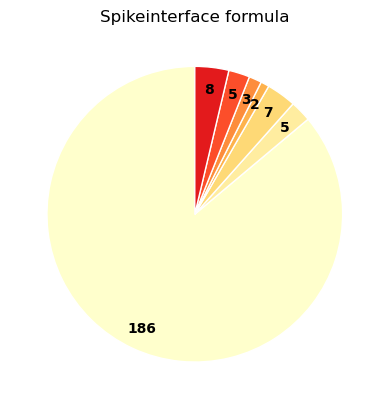

100%|██████████| 7/7 [00:43<00:00,  6.18s/it]


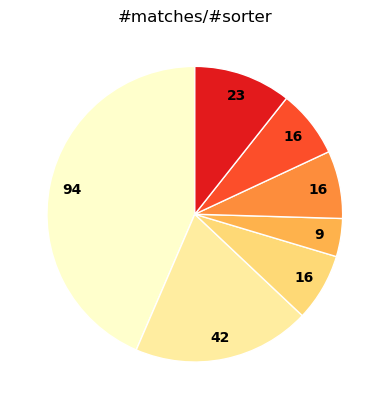

100%|██████████| 7/7 [00:43<00:00,  6.15s/it]


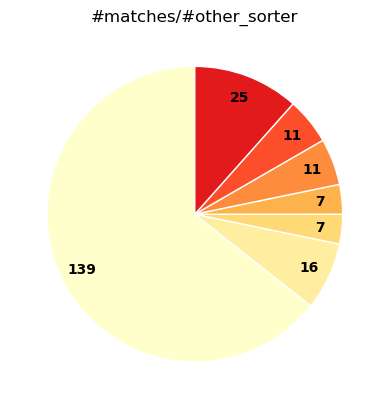

--------------------------------------------------
herdingspikes


100%|██████████| 7/7 [00:38<00:00,  5.57s/it]


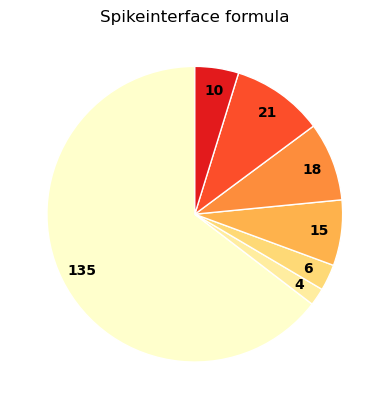

100%|██████████| 7/7 [00:37<00:00,  5.39s/it]


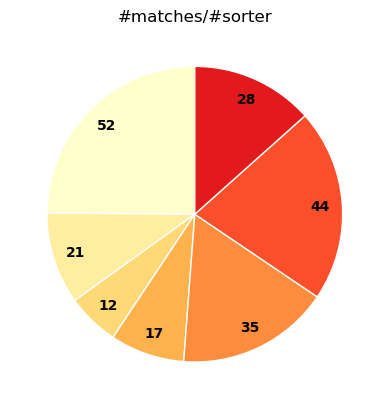

100%|██████████| 7/7 [00:37<00:00,  5.33s/it]


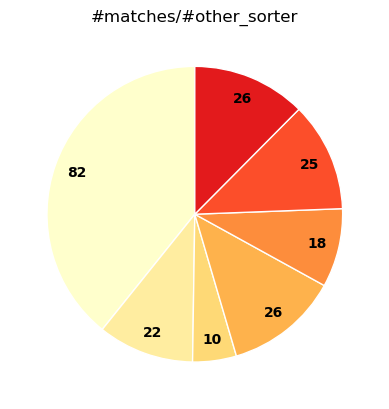

--------------------------------------------------
tridesclous


100%|██████████| 7/7 [00:48<00:00,  6.96s/it]


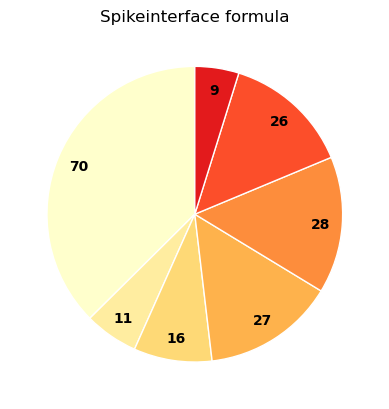

100%|██████████| 7/7 [00:48<00:00,  6.91s/it]


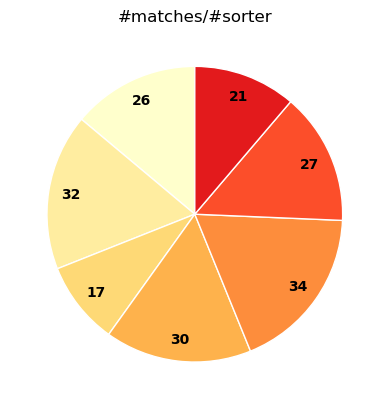

100%|██████████| 7/7 [00:49<00:00,  7.07s/it]


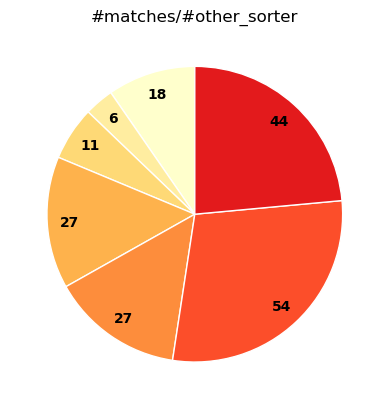

--------------------------------------------------
kilosort2


100%|██████████| 7/7 [01:21<00:00, 11.59s/it]


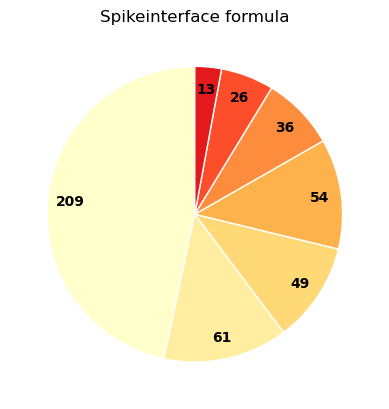

100%|██████████| 7/7 [01:21<00:00, 11.66s/it]


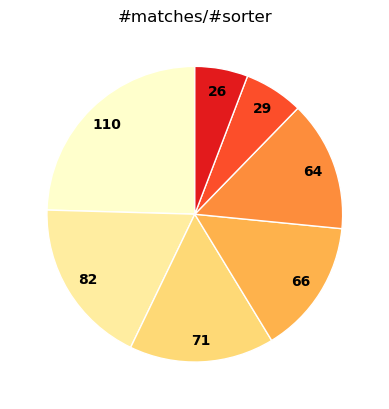

100%|██████████| 7/7 [01:21<00:00, 11.60s/it]


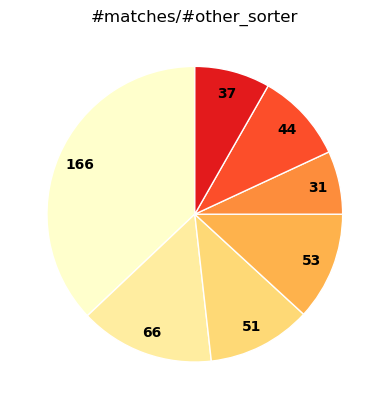

--------------------------------------------------
hdsort


100%|██████████| 7/7 [01:07<00:00,  9.58s/it]


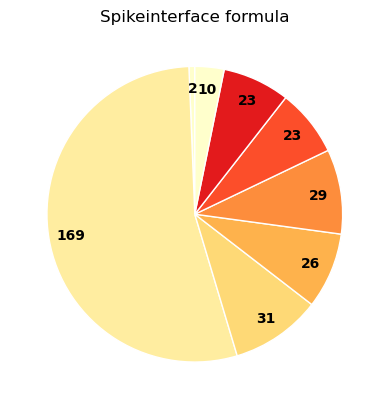

100%|██████████| 7/7 [01:05<00:00,  9.39s/it]


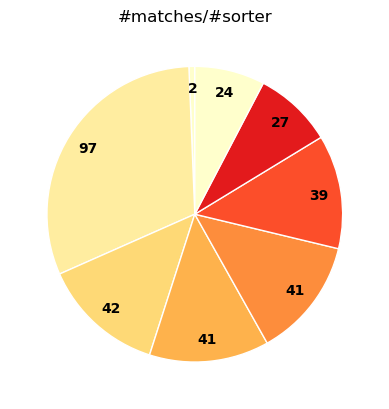

100%|██████████| 7/7 [01:05<00:00,  9.32s/it]


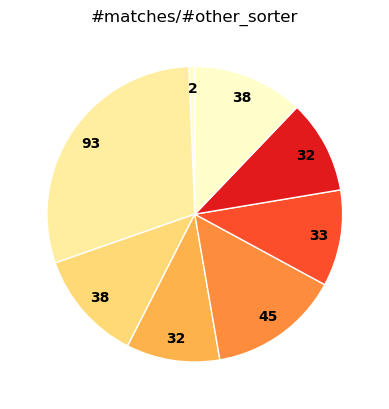

--------------------------------------------------
spykingcircus


100%|██████████| 7/7 [01:53<00:00, 16.18s/it]


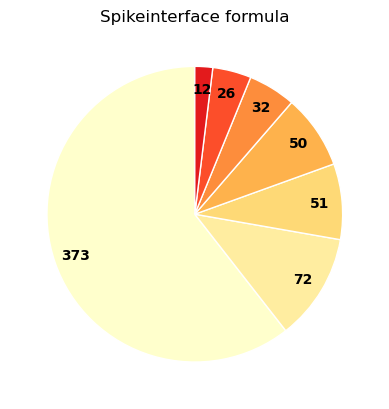

100%|██████████| 7/7 [01:52<00:00, 16.12s/it]


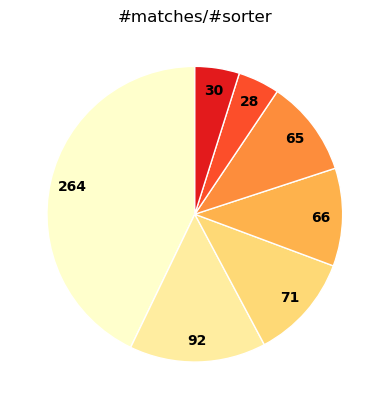

100%|██████████| 7/7 [01:52<00:00, 16.06s/it]


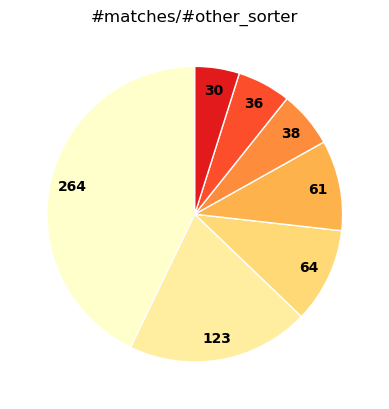

--------------------------------------------------
ironclust


100%|██████████| 7/7 [01:00<00:00,  8.63s/it]


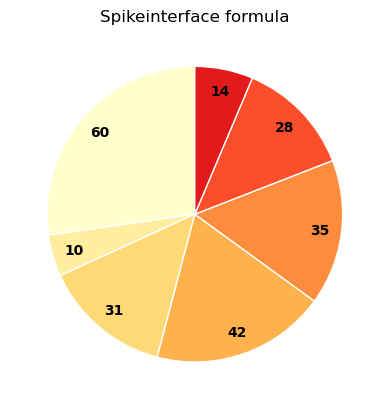

100%|██████████| 7/7 [01:00<00:00,  8.60s/it]


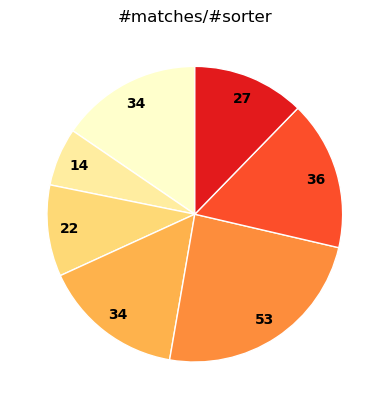

100%|██████████| 7/7 [00:59<00:00,  8.57s/it]


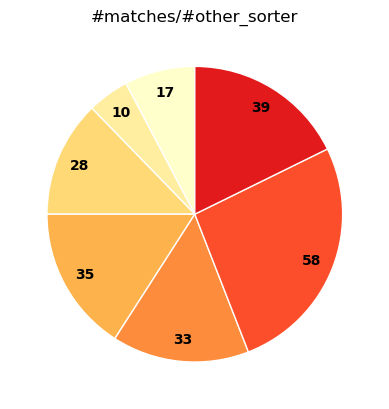

In [8]:
# Create pie charts
def plot_pie(sizes, labels):
    """
    Params
    sizes:
        Number of elements in each wedge
            _, counts = np.unique(all_matched_unit_ids, return_counts=True)
            num_sorters, counts = np.unique(counts, return_counts=True)
            plot_pie(counts, num_sorters)
    """
    
    # Generate a list of colors for each section using 'YlOrRd' colormap
    # colors = ['#FFFFCC', '#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C', '#FC4E2A']
    # colors = ['#fef2aa', '#fbdc79', '#fbb24a', "#ff8035", "#fa3e22", "#d50e24"]
    colors= ['#FFFFCC', '#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C', '#FC4E2A', '#E31A1C']

    # Create the pie chart with white lines separating sections
    wedges, _ = plt.pie(sizes, colors=colors, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    # Set the title
    plt.title("Units detected by k sorters")

    # Add labels with the numbers from 'sizes' on the edges of each wedge
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
        
        # Numbers outside of wedge
        # x = wedge.r * 1.1 * np.cos(angle * (3.14159 / 180))
        # y = wedge.r * 1.1 * np.sin(angle * (3.14159 / 180))
        # plt.text(x, y, str(sizes[i]), va='center', ha='center')
        
        # Numbers inside of wedge
        x = (wedge.r - 0.15) * np.cos(angle * (np.pi / 180))
        y = (wedge.r - 0.15) * np.sin(angle * (np.pi / 180))
        plt.text(x, y, str(sizes[i]), ha='center', va='center', color='black', fontweight='bold')

    # Add legend
    # plt.legend(wedges, labels, title="k=", loc='best')

    # Display the chart
    # plt.show()


def plot_sorter_pies(sorter_idx):
    # Plot pie charts for comparison using spikeinterface formula, #matches/sorter, #matches/#other_sorter   
    print("-"*50)
    print(SORTER_NAMES[sorter_idx])
    sorter = all_sorters[sorter_idx]
    for score_formula, score_name in zip(
        (1.5, 1, 2),
        ("Spikeinterface formula", "#matches/#sorter", "#matches/#other_sorter")
        ):
        all_matched_unit_ids = list(range(len(sorter)))  # All units start by being detected by its own sorter
        
        for comp_idx in tqdm(range(len(all_sorters))):
            if comp_idx == sorter_idx:
                continue
            comp = Comparison(sorter, all_sorters[comp_idx], score_formula=score_formula)
            for sorter_idx, comp_idx in enumerate(comp.match12):
                if comp_idx != -1:
                    all_matched_unit_ids.append(sorter_idx)
        
        _, counts = np.unique(all_matched_unit_ids, return_counts=True)
        num_sorters, counts = np.unique(counts, return_counts=True)
        plot_pie(counts, num_sorters)
        plt.title(score_name)
        plt.show()
    
for sorter_idx in range(len(all_sorters)):
    plot_sorter_pies(sorter_idx)